<a href="https://colab.research.google.com/github/tca-codes/fraudulent-transactions/blob/main/ANGELES_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Part 1

First choice: dataset 1

1) Source of data
- https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction

2) Brief description of data
- The data shows a number of transactions and whether they are fraudulent transactions or not. This is important information that banks of financial institutions have that can help them prevent fraudulent transactions in the future. Below are the columns:
  - step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
  - type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
  - amount - amount of the transaction in local currency.
  - nameOrig - customer who started the transaction
  - oldbalanceOrg - initial balance before the transaction
  - newbalanceOrig - new balance after the transaction
  - nameDest - customer who is the recipient of the transaction
  - oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
  - newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

3) What is the target?
- isFraud (this column describes whether a transaction is fraudulent or not)

4) Is this a classification or regression problem?
- This is a classification problem.

5) How many features?
- There are 11 columns.

6) How many rows of data.
- There are 6,362,620 rows of data.

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- The most challenging would probably be deciding which columns are important to keep for the modeling. For me, not all columns are relevant for modeling like the names of the customers who sent and received the data.


In [1]:
import pandas as pd
filename = '/content/Fraud.csv'
df = pd.read_csv(filename)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.shape

(6362620, 11)

Second choice: dataset 2

1) Source of data
- https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

2) Brief description of data
- "Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers."

3) What is the target?
- "Need to perform clustering to summarize customer segments."

4) Is this a classification or regression problem?
- This is a classification problem

5) How many features?
- There are 29 columns.

6) How many rows of data.
- There are 2240 rows of data.

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- Cleaning the data and choosing the columns would be a challenge since there are so many features that can be used for the modeling. Exploring the data would also be challenging since there are a lot of factors that could affect the clustering of customers.

In [3]:
filename1 = '/content/marketing_campaign.csv'
mc_df = pd.read_csv(filename1, delimiter='\t' , parse_dates=['Year_Birth' , 'Dt_Customer'])
mc_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
mc_df.shape

(2240, 29)

#Project - Part 2

##Load the Dataset

In [5]:
# Import needed Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
filename = '/content/Fraud.csv'
df = pd.read_csv(filename)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


##Clean the Dataset

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Check if there are any Duplicated Rows

In [9]:
df.duplicated().sum()

0

Check each column and correct inconsistent values

In [10]:
df['step'].value_counts(dropna=False)

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [11]:
df['type'].value_counts(dropna=False)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [12]:
df['amount'].value_counts(dropna=False)

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: amount, Length: 5316900, dtype: int64

In [13]:
df['nameOrig'].value_counts(dropna=False)

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [14]:
df['oldbalanceOrg'].value_counts(dropna=False)

0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
34577.49           1
184929.21          1
29320.33           1
82645.19           1
641239.85          1
Name: oldbalanceOrg, Length: 1845844, dtype: int64

In [15]:
df['newbalanceOrig'].value_counts(dropna=False)

0.00         3609566
5888.64            4
15073.44           4
5122.00            4
36875.73           4
              ...   
51345.64           1
46527.23           1
30839.51           1
25521.75           1
160296.36          1
Name: newbalanceOrig, Length: 2682586, dtype: int64

In [16]:
df['nameDest'].value_counts(dropna=False)

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [17]:
df['oldbalanceDest'].value_counts(dropna=False)

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
967022.27            1
327279.67            1
2039554.04           1
587552.25            1
6510099.11           1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [18]:
df['newbalanceDest'].value_counts(dropna=False)

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [19]:
df['isFraud'].value_counts(dropna=False)

0    6354407
1       8213
Name: isFraud, dtype: int64

In [20]:
df['isFlaggedFraud'].value_counts(dropna=False)

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [21]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no rows with missing values.

##Explore the Dataset

Check correlation between features.

In [22]:
corr = df.corr()

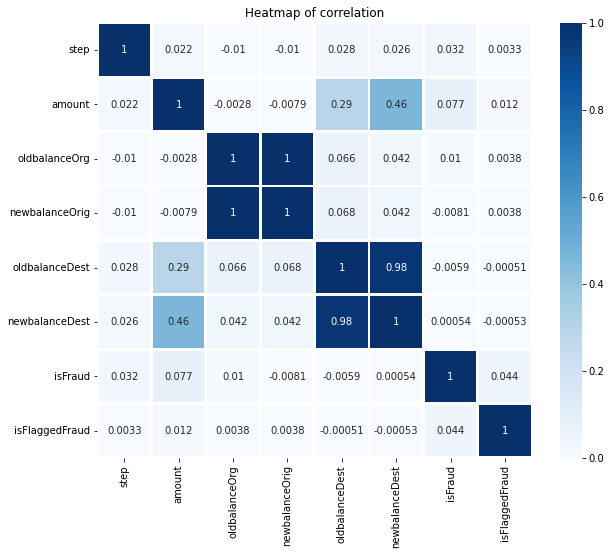

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot=True)
plt.title('Heatmap of correlation')
plt.show();

newbalanceDest and oldbalanceDest have a positive correlation, as well as newbalanceOrig and oldbalanceOrig.

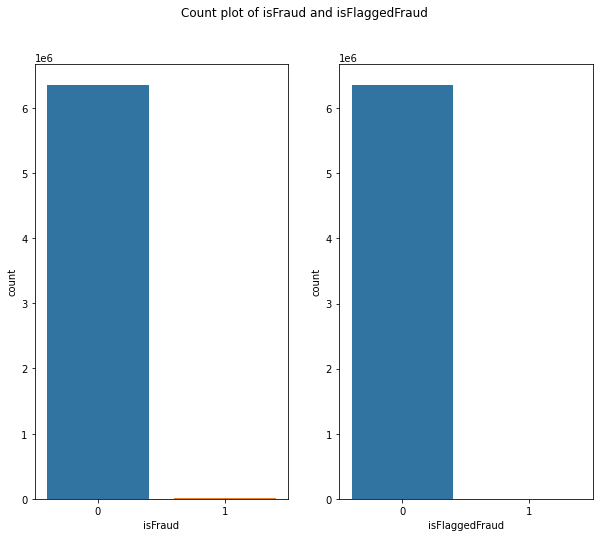

In [24]:
plt.figure(figsize=(10,8))

plt.subplot(121)
ax = sns.countplot(data=df,x='isFraud')

plt.subplot(122)
ax = sns.countplot(data=df,x='isFlaggedFraud')

plt.suptitle('Count plot of isFraud and isFlaggedFraud')
plt.show()

Out of all 6,362,620 transactions, only 8,213 or 0.129% were fraudulent.

In [25]:
df.groupby('isFlaggedFraud')['isFraud'].value_counts(dropna=False)

isFlaggedFraud  isFraud
0               0          6354407
                1             8197
1               1               16
Name: isFraud, dtype: int64

Also, only 16 of the fraudulent transactions were flagged as fraud.

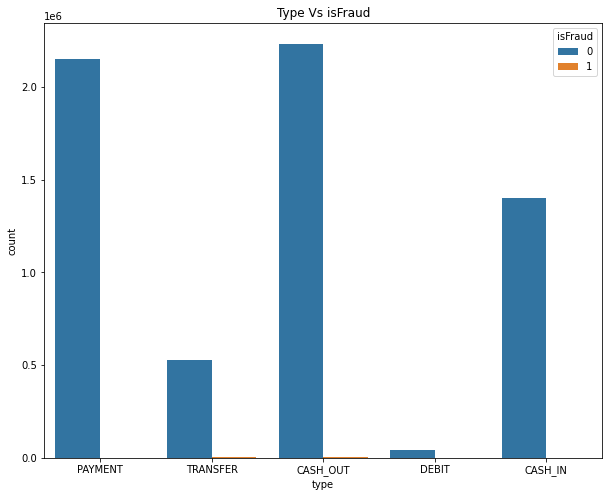

In [26]:
# Countplot of type feature
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='type',hue='isFraud')
plt.title('Type Vs isFraud')
plt.show();

In [27]:
df.groupby('isFraud')['type'].value_counts(dropna=False)

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: type, dtype: int64

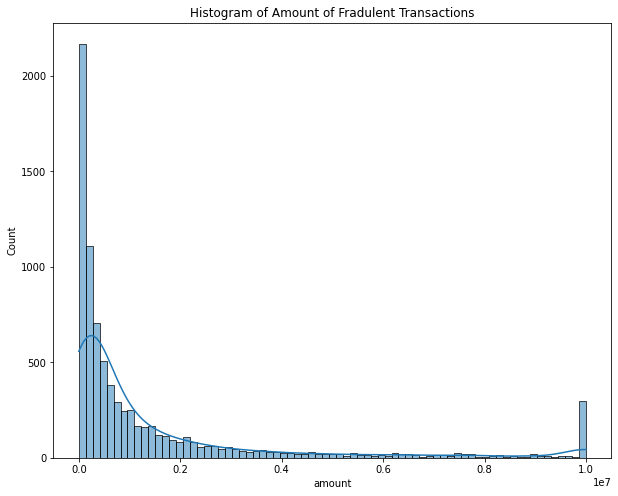

In [28]:
# Histogram of Amount feature based on fraud
plt.figure(figsize=(10,8))
sns.histplot(data=df[df['isFraud']==1],x='amount',kde=True)
plt.title('Histogram of Amount of Fradulent Transactions')
plt.show();

Most of the fraudulent transactions are below the amount of 200,000.

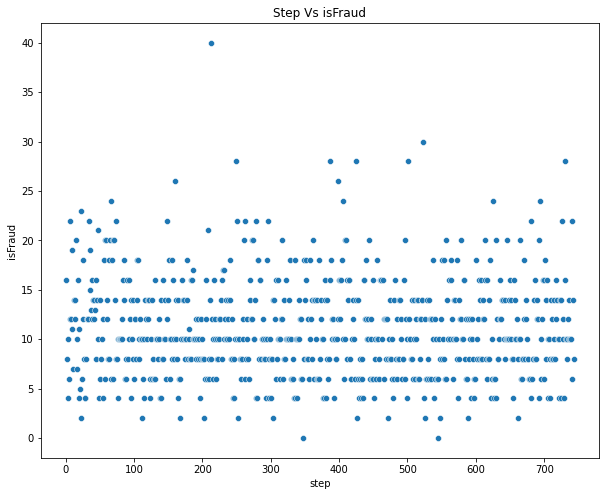

In [29]:
step_group = df.groupby('step').sum().reset_index()
plt.figure(figsize=(10,8))
sns.scatterplot(data=step_group,x='step',y='isFraud')
plt.title('Step Vs isFraud')
plt.show()

The steps don't really affect the isFraud column.

#Prepare data for Modeling + Preprocessing

Unsupervised Learning: Remove "isFlaggedFraud" column to see if the model can learn which transactions are fraud without that column.

In [30]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [31]:
# Save X data
X = df.drop(columns = ['isFraud','step','nameOrig','nameDest','isFlaggedFraud'])
# Encode our target
y = df['isFraud']

Removed unnecessary columns

In [32]:
X.shape

(6362620, 6)

In [33]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [34]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# PCA
pca = PCA()

In [35]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [36]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [37]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef9673a0d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef66a4a250>)])

In [38]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef9673a0d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef66a4a250>)])

In [39]:
X_train.shape

(4771965, 6)

In [40]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [41]:
pca.fit(X_train_processed)

PCA()

In [42]:
X_train_processed.shape

(4771965, 10)

There are 10 columns before PCA.

Text(0, 0.5, 'Proportion of Explained Variance')

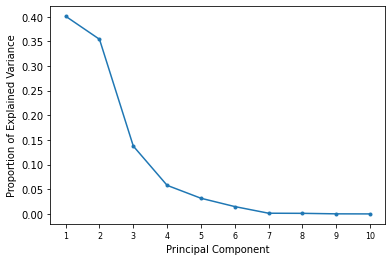

In [43]:
# Visualize the Scree Plot
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [44]:
# Instantiate PCA, fit and transform to the model
pca3 = PCA(n_components=3)
X_train = pca3.fit_transform(X_train_processed)
X_test = pca3.transform(X_test_processed)
X_train.shape

(4771965, 3)

Since we are trying to classify whether a transaction is fraud or not, this means that we are doing a binary classification. I will be using the sigmoid activation function for the output layer, use BCE for the loss, and adam for the optimizer.

In [45]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

3

#Unsupervised Learning - Model 1 (Binary Classification)

In [46]:
# Sequential model
model = Sequential()

In [76]:
# First hidden layer
model.add(Dense(3, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(3, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [77]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

In [78]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
149124/149124 [==============================] - 308s 2ms/step - loss: 0.0078 - accuracy: 0.9989 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 2/10
149124/149124 [==============================] - 307s 2ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 3/10
149124/149124 [==============================] - 308s 2ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 4/10
149124/149124 [==============================] - 423s 3ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 5/10
149124/149124 [==============================] - 335s 2ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9991
Epoch 6/10
149124/149124 [==============================] - 329s 2ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 7/10
149124/149124 [==============================] - 329s 2ms/step - loss: 0.0046 - accuracy:

In [49]:
# You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

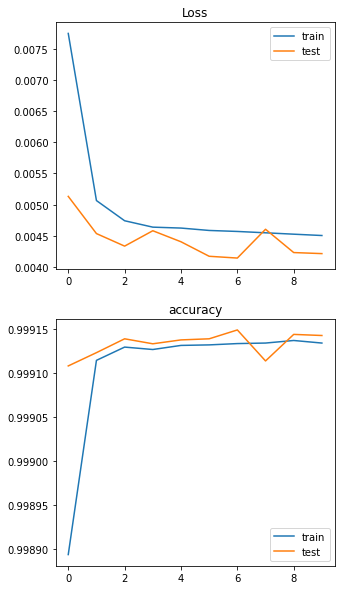

In [80]:
plot_history(history, 'accuracy')

Training Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765797
           1       0.88      0.39      0.54      6168

    accuracy                           1.00   4771965
   macro avg       0.94      0.69      0.77   4771965
weighted avg       1.00      1.00      1.00   4771965



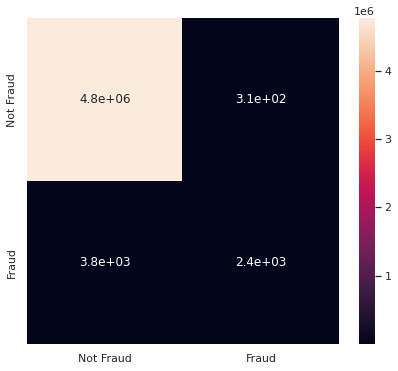



Testing Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.87      0.39      0.54      2045

    accuracy                           1.00   1590655
   macro avg       0.94      0.69      0.77   1590655
weighted avg       1.00      1.00      1.00   1590655



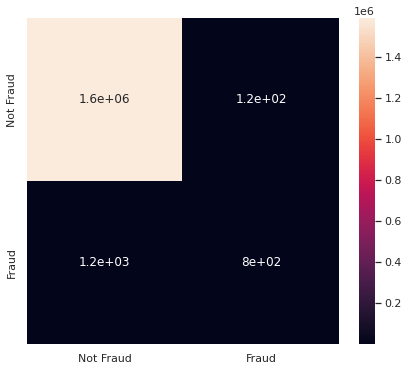

In [86]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['Not Fraud', 'Fraud']

# Get training predictions and round them to integers instead of floats
train_preds = np.rint(model.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds)
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds = np.rint(model.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds))

# Confusion Matrix
conf_mat_test = confusion_matrix(y_test, test_preds)
heatmap(conf_mat_test, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

In [53]:
def plot_cf_matrix(cf_matrix, title):
    sns.set(rc={'figure.figsize':(7,6)})
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title(title)
    plt.show()

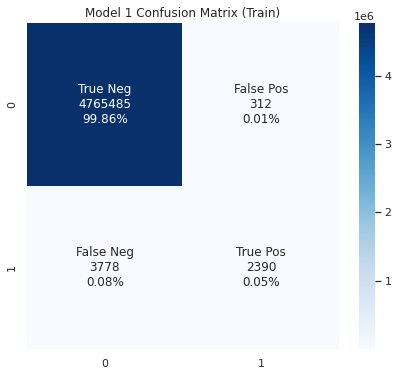

In [88]:
plot_cf_matrix(conf_mat, title='Model 1 Confusion Matrix (Train)')

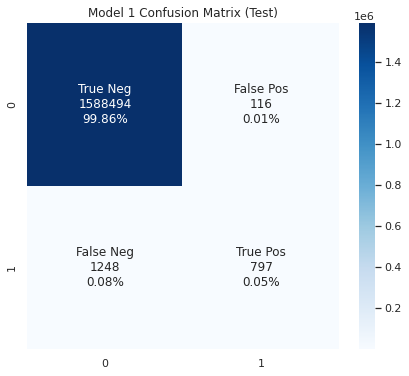

In [89]:
plot_cf_matrix(conf_mat_test, title='Model 1 Confusion Matrix (Test)')

#Unsupervised Learning - Model 2 (Binary Classification)

In [90]:
# Sequential model
model2 = Sequential()

# First hidden layer
model2.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model2.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model2.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model2.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

# Step 3: Fit our model
history2 = model2.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
149124/149124 [==============================] - 367s 2ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 2/10
149124/149124 [==============================] - 371s 2ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 3/10
149124/149124 [==============================] - 368s 2ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 4/10
149124/149124 [==============================] - 373s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/10
149124/149124 [==============================] - 365s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 6/10
149124/149124 [==============================] - 368s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9986
Epoch 7/10
149124/149124 [==============================] - 372s 2ms/step - loss: 0.0032 - accuracy:

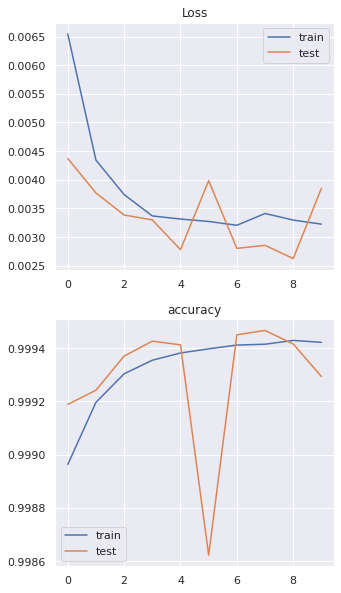

In [91]:
# Visualize the loss
plot_history(history2, 'accuracy')

Training Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765797
           1       0.84      0.58      0.68      6168

    accuracy                           1.00   4771965
   macro avg       0.92      0.79      0.84   4771965
weighted avg       1.00      1.00      1.00   4771965



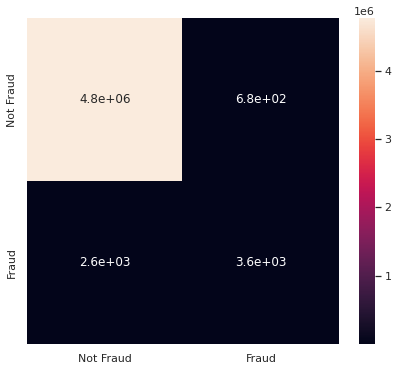



Testing Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.82      0.58      0.68      2045

    accuracy                           1.00   1590655
   macro avg       0.91      0.79      0.84   1590655
weighted avg       1.00      1.00      1.00   1590655



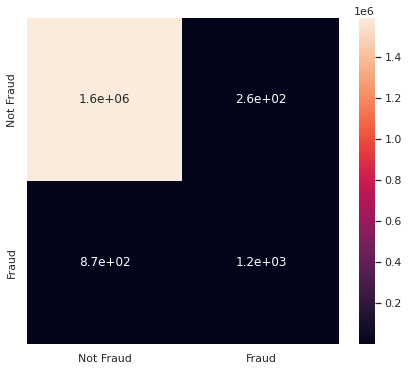

In [92]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['Not Fraud', 'Fraud']

# Get training predictions and round them to integers instead of floats
train_preds2 = np.rint(model2.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds2))

# Confusion Matrix
conf_mat2 = confusion_matrix(y_train, train_preds2)
heatmap(conf_mat2, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds2 = np.rint(model2.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds2))

# Confusion Matrix
conf_mat_test2 = confusion_matrix(y_test, test_preds2)
heatmap(conf_mat_test2, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

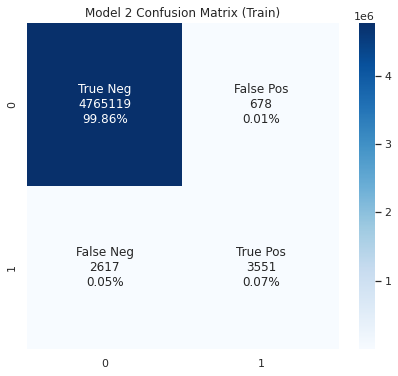

In [93]:
plot_cf_matrix(conf_mat2, title='Model 2 Confusion Matrix (Train)')

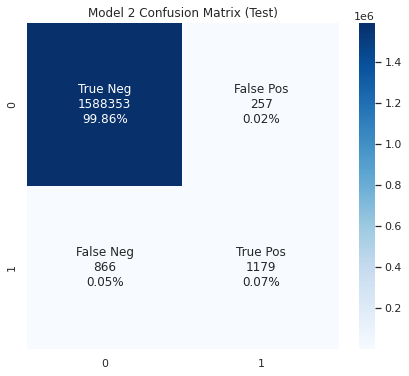

In [94]:
plot_cf_matrix(conf_mat_test2, title='Model 2 Confusion Matrix (Test)')

#Unsupervised Learning - Model 3 (Binary Classification)

In [47]:
# Sequential model
model3 = Sequential()

# First hidden layer
model3.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model3.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Third hidden layer
model3.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model3.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model3.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

# Step 3: Fit our model
history3 = model3.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
149124/149124 [==============================] - 366s 2ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 2/10
149124/149124 [==============================] - 385s 3ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 3/10
149124/149124 [==============================] - 400s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/10
149124/149124 [==============================] - 389s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 5/10
149124/149124 [==============================] - 366s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/10
149124/149124 [==============================] - 365s 2ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 7/10
149124/149124 [==============================] - 384s 3ms/step - loss: 0.0031 - accuracy:

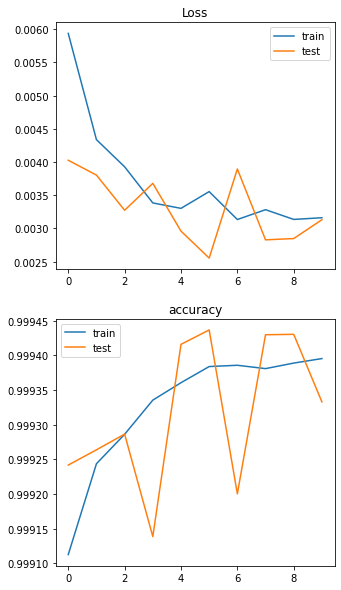

In [50]:
# Visualize the loss
plot_history(history3, 'accuracy')

Training Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765797
           1       0.77      0.69      0.73      6168

    accuracy                           1.00   4771965
   macro avg       0.89      0.85      0.87   4771965
weighted avg       1.00      1.00      1.00   4771965



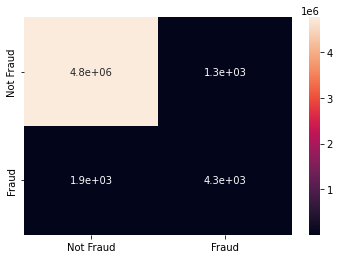



Testing Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.77      0.69      0.73      2045

    accuracy                           1.00   1590655
   macro avg       0.88      0.84      0.86   1590655
weighted avg       1.00      1.00      1.00   1590655



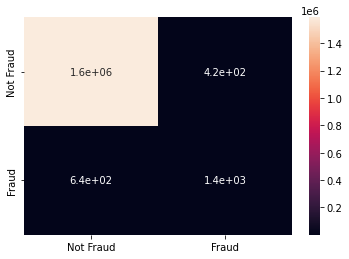

In [51]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['Not Fraud', 'Fraud']

# Get training predictions and round them to integers instead of floats
train_preds3 = np.rint(model3.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds3))

# Confusion Matrix
conf_mat3 = confusion_matrix(y_train, train_preds3)
heatmap(conf_mat3, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds3 = np.rint(model3.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds3))

# Confusion Matrix
conf_mat3 = confusion_matrix(y_test, test_preds3)
heatmap(conf_mat3, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

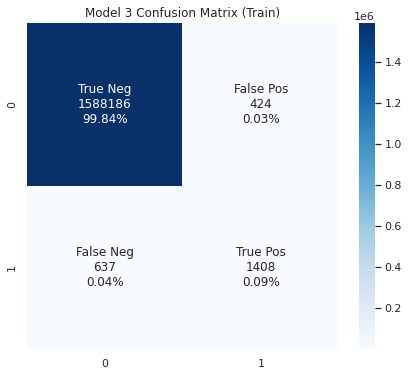

In [54]:
plot_cf_matrix(conf_mat3, title='Model 3 Confusion Matrix (Train)')

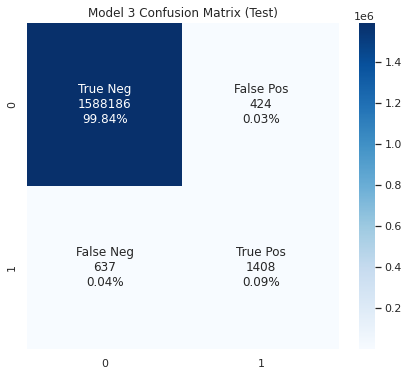

In [56]:
plot_cf_matrix(conf_mat3, title='Model 3 Confusion Matrix (Test)')

#Supervised Learning

Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [97]:
# Looking at some hyperparameters that seem tunable
dec_tree

DecisionTreeClassifier(random_state=42)

In [98]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

In [99]:
dec_tree.predict(X_test_processed)

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
# calculate classification accuracy
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.9997466452499127


Bagging Classifier

In [60]:
bagcla = BaggingClassifier(random_state = 42)

In [61]:
# Look at the hyperparameters
bagcla.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [62]:
bagcla.fit(X_train_processed, y_train)

BaggingClassifier(random_state=42)

In [63]:
bagcla_pred = bagcla.predict(X_test_processed)

In [64]:
bagcla_train_score = bagcla.score(X_train_processed, y_train)
bagcla_test_score = bagcla.score(X_test_processed, y_test)
print(bagcla_train_score)
print(bagcla_test_score)

0.9999790442721185
0.9997736781388799


In [65]:
bagcla_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
bagging_df = pd.DataFrame([bagcla_pred, y_test.values])
bagging_df

,0,1,2,3,4,5,6,7,8,9,...,1590645,1590646,1590647,1590648,1590649,1590650,1590651,1590652,1590653,1590654
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Random Forest Classifier

In [106]:
rf = RandomForestClassifier(random_state = 42)

In [107]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [109]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [110]:
rf.predict(X_test_processed)

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9999991617708848
0.9996856640817776


KNN Classifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=1)

In [114]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [115]:
knn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=1)

In [116]:
predictions_knn = knn.predict(X_test_processed)

In [117]:
predictions_knn

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
# calculate classification accuracy
knn_score = knn.score(X_test_processed, y_test)
knn_score

0.9994222505823073

The Covid-19 pandemic and its corresponding rapid digital acceleration has made financial fraud more prevalent in the world.

Most of the fraudulent transactions are done through bank transfers and cashing out. 

Most fraudulent transactions have an amount below 200,000 and these are usually the ones that are not easy to flag as fraud.

Although banks and financial institutions are already raising awareness right now about the issue of financial fraud by constantly updating their policies and reminding their customers regularly about updating their account passwords, etc., this is clearly not enough. 

Fraud detection is important because the faster it is to report a transaction as fraud, the faster it will be to solve the issue and retrieve the stolen amount. Therefore, we need a model that can quickly and accurately detect whether a transaction is fraudulent or not, based on standard transaction data.

The model created using Unsupervised Learning can be used for any transactional data since it uses standard data that banks or financial institutions have (type, amount, oldbalanceOrig, newbalanceOrg, oldbalanceDest, newbalanceDest). Banks would be able to handle fraudulent transactions better if they use a machine learning model for fraud detection.

Out of all Unsupervised Learning models, I would recommend using Model 3 since it was able to detect the most true positives, which means it was able to detect the most fraudulent transactions compared to the other 2. It is also still very accuracte, with the accuracy score being very close to 1.

